In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import pickle as pkl
import seaborn as sns
import scipy

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


Basing on the shape, the data do not appear to be correlated


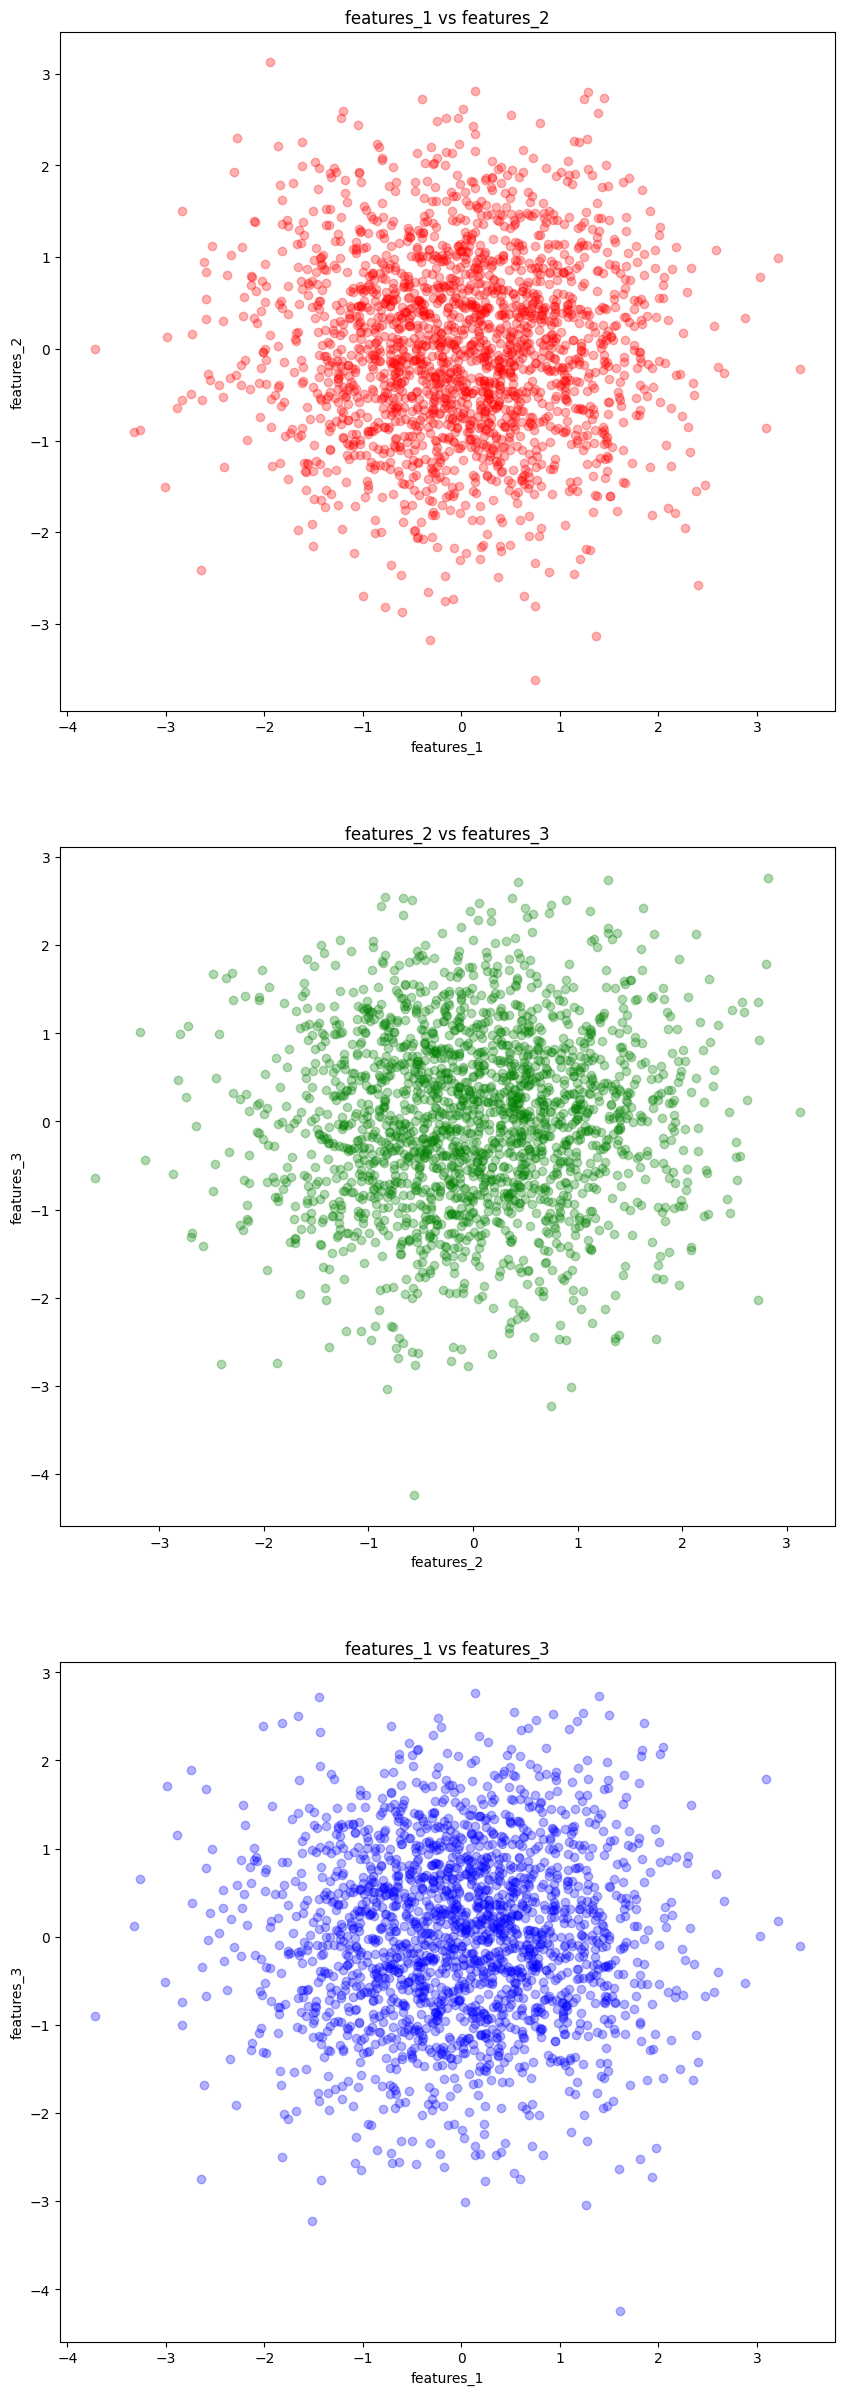

In [7]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
with open("data/regression_generated.csv", 'r') as fin:
    df = pd.read_csv(fin)
display(df)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax1.scatter(x=df['features_1'], y=df['features_2'], marker='o', c='r', alpha=0.3)
ax1.set_title('features_1 vs features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')

ax2.scatter(x=df['features_2'], y=df['features_3'], marker='o', c='g', alpha=0.3)
ax2.set_title('features_2 vs features_3')
ax2.set_xlabel('features_2')
ax2.set_ylabel('features_3')

ax3.scatter(x=df['features_1'], y=df['features_3'], marker='o', c='b', alpha=0.3)
ax3.set_title('features_1 vs features_3')
ax3.set_xlabel('features_1')
ax3.set_ylabel('features_3')

fig.show()

print("Basing on the shape, the data do not appear to be correlated")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

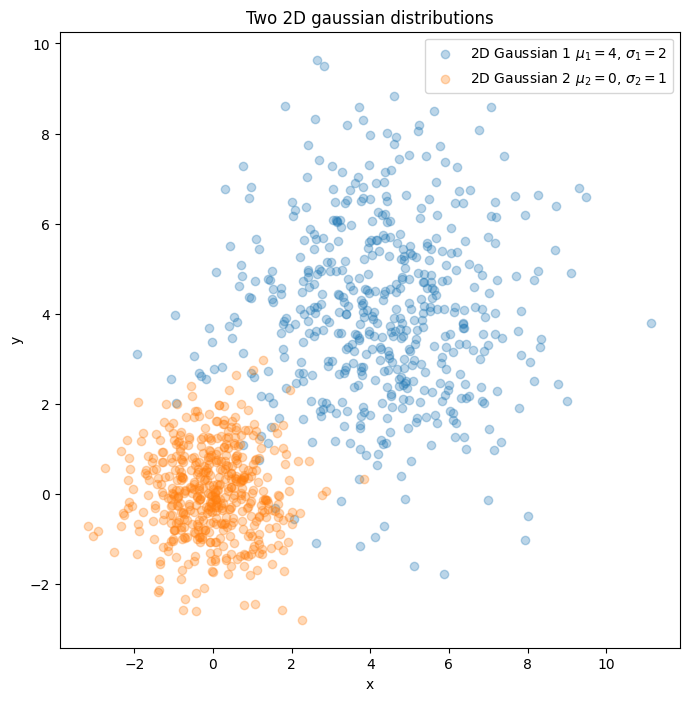

In [4]:
mean = [4,0]
stddev = [2,1]
samples = 500

cov_1 = [[stddev[0]**2, 0],
              [0, stddev[0]**2]]

cov_2 = [[stddev[1]**2, 0],
              [0, stddev[1]**2]]

g1 = np.random.multivariate_normal([mean[0], mean[0]], cov_1, size=samples)
g2 = np.random.multivariate_normal([mean[1], mean[1]], cov_2, size=samples)

fig, axis = plt.subplots(figsize=(8,8))
axis.scatter(x=g1[:,0], y=g1[:,1], label="2D Gaussian 1 $\mu_1=4$, $\sigma_1=2$", alpha=0.3)
axis.scatter(x=g2[:,0], y=g2[:,1], label="2D Gaussian 2 $\mu_2=0$, $\sigma_2=1$", alpha=0.3)
axis.legend()
axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_title("Two 2D gaussian distributions")
fig.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


As the distances increase in value, we note a small increase in the value of the residuals too, albeit small.


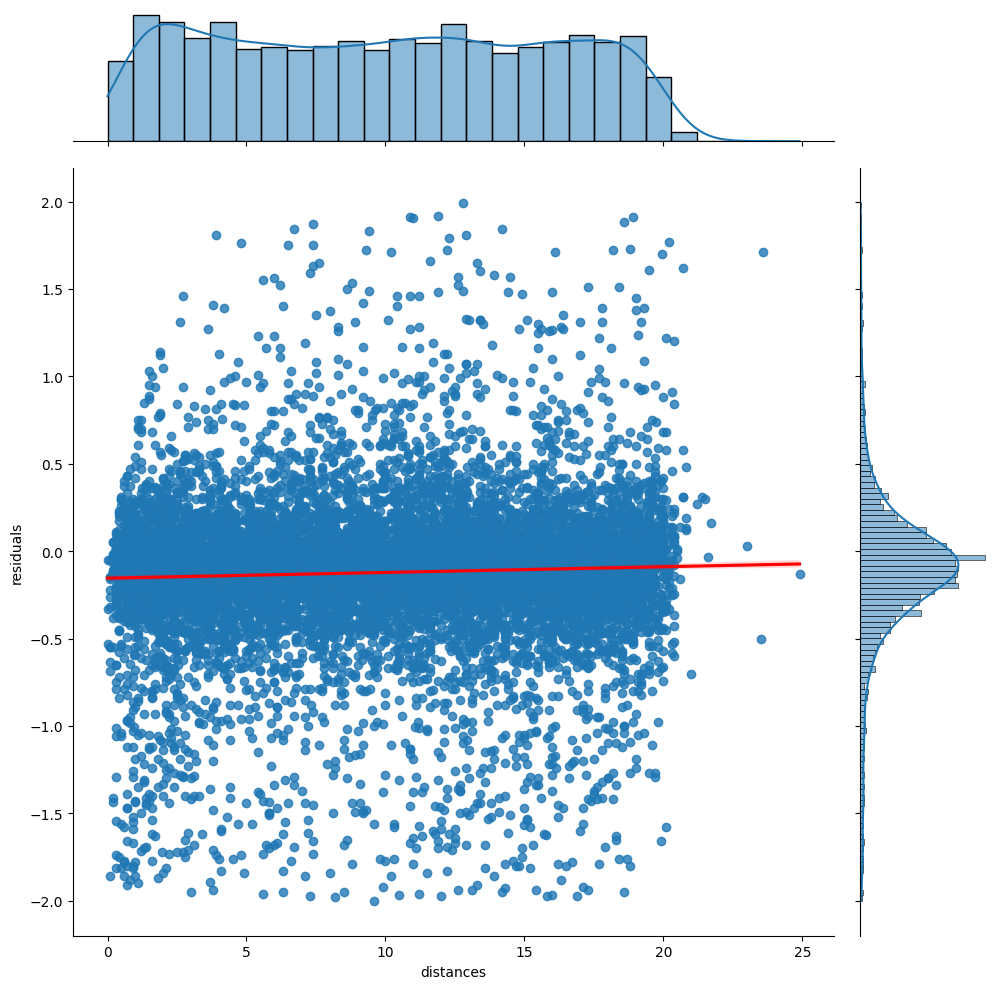

In [16]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
with open("data/residuals_261.pkl", 'rb') as fin:
    dataSet = pkl.load(fin).reshape(1)
residuals = dataSet[0]['residuals']
distances = dataSet[0]['distances']
dataSet = pd.DataFrame.from_dict(dataSet[0])
df = dataSet[abs(dataSet['residuals'])<2]
display(df)
sns.jointplot(data=df, x='distances', y='residuals', kind="reg", height=10, joint_kws={"line_kws":{"color": "r"}}) 

print("As the distances increase in value, we note a small increase in the value of the residuals too, albeit small.")


Text(0, 0.5, 'count')

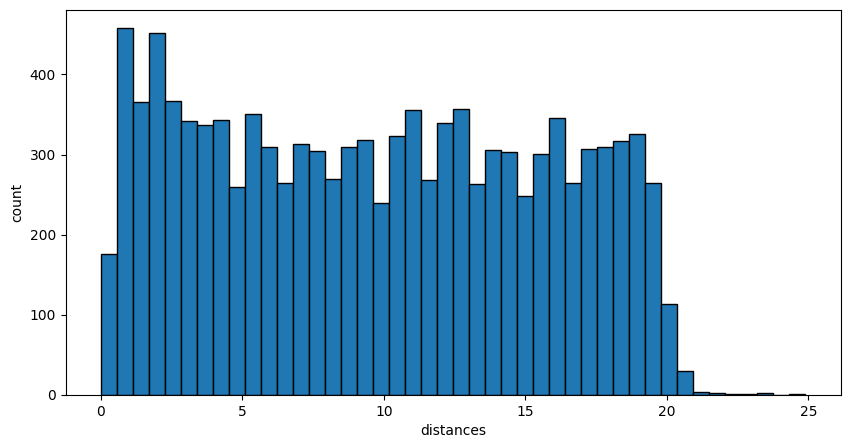

In [6]:
# a good way to define the number of bins is with the Freedman Diaconis rule.
binNumber = int(2*(len(distances)**(1/3)))

fig, axis = plt.subplots(figsize=(10,5))
binsValues, binsEdges, _= axis.hist(distances, bins=binNumber, edgecolor='k')
axis.set_xlabel("distances")
axis.set_ylabel("count")


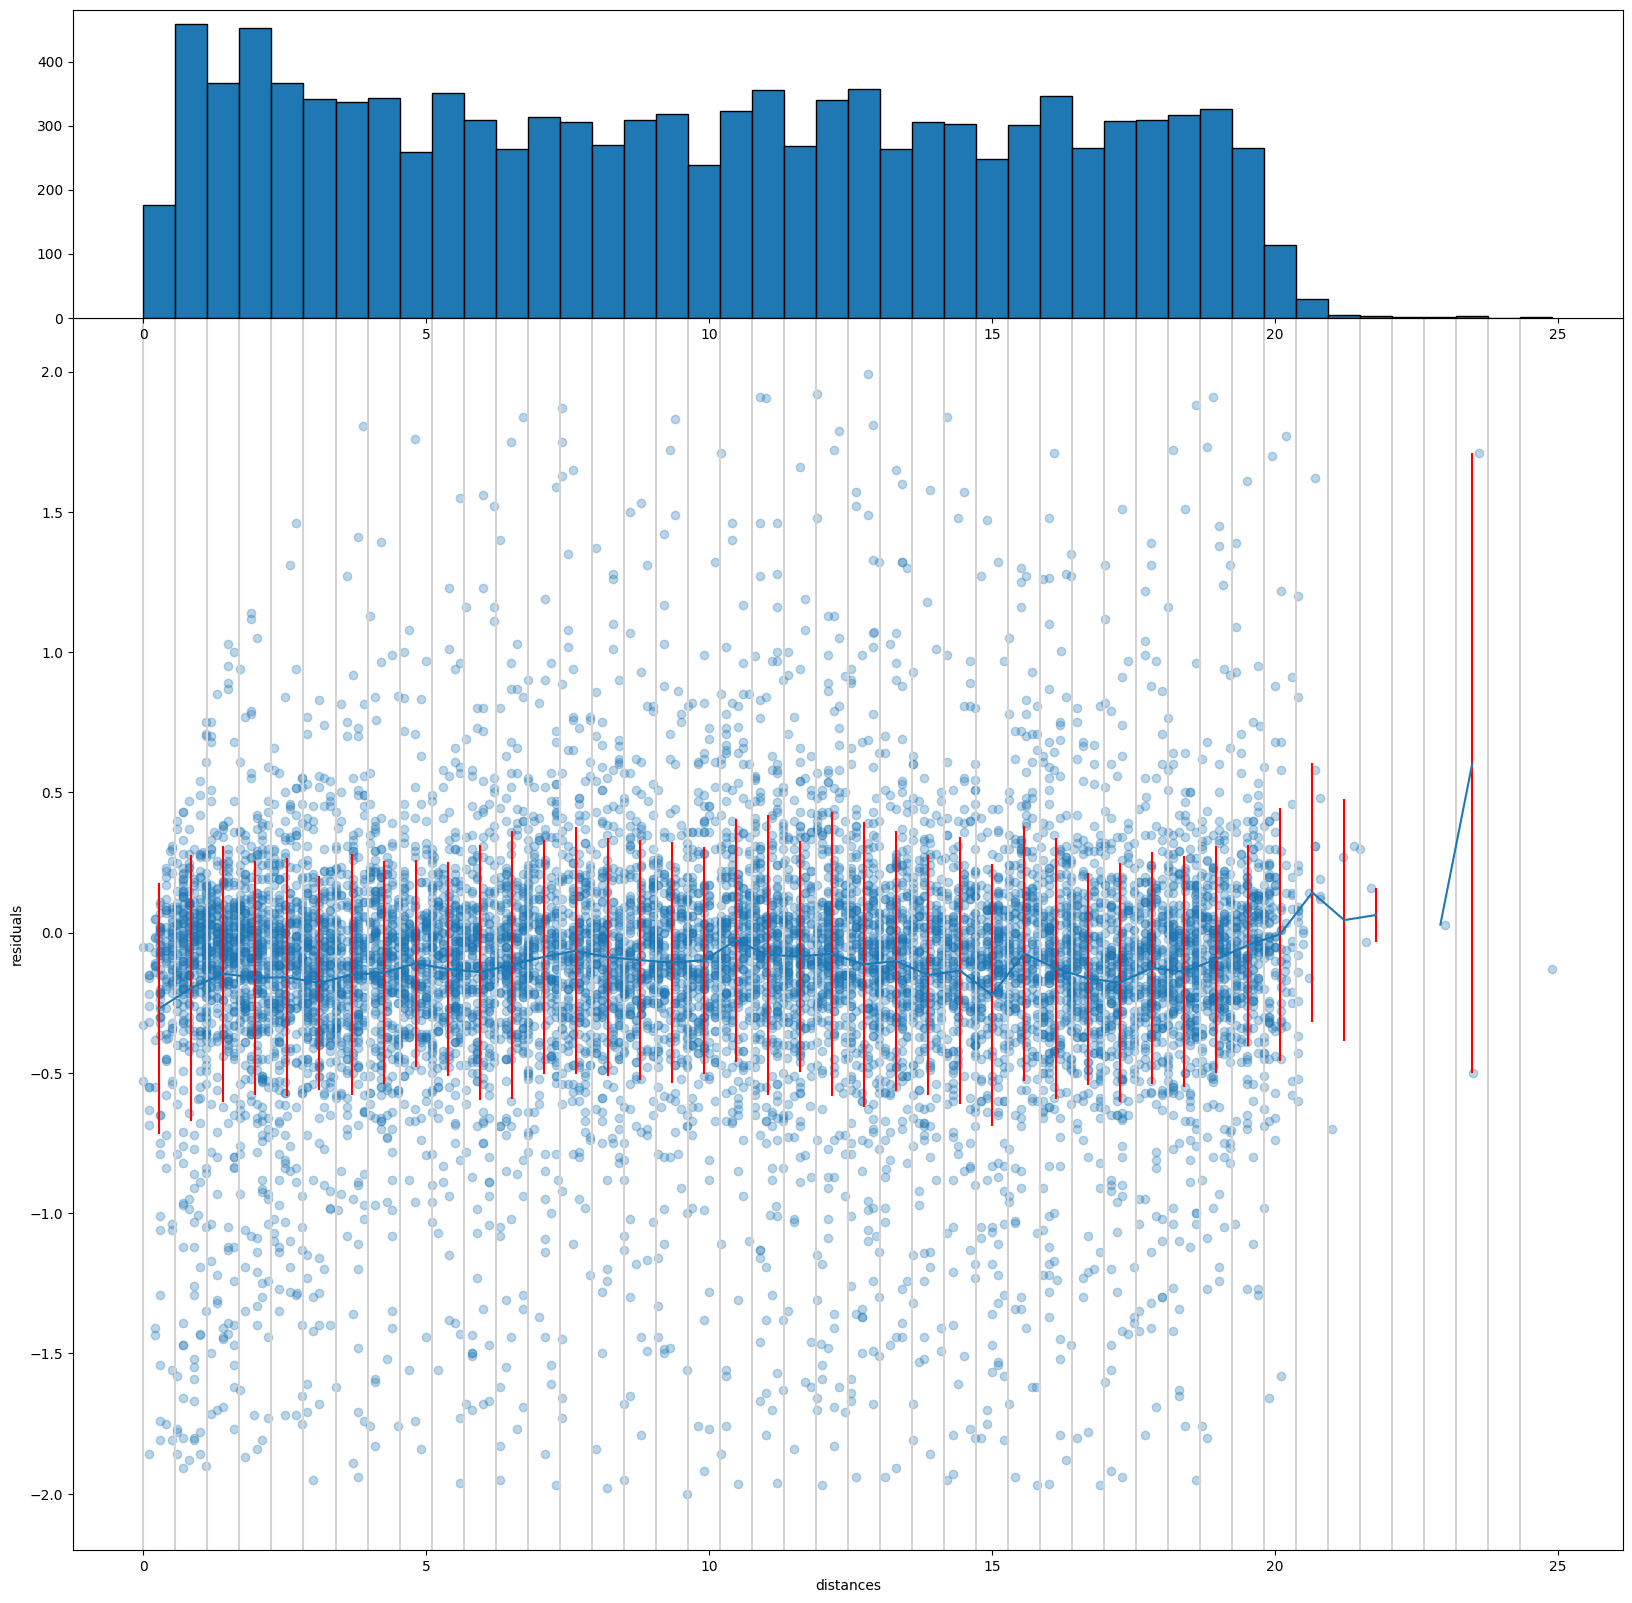

In [10]:
# center of each bin (x)
binCenters = [(binsEdges[x+1] + binsEdges[x])/2 for x in range(binNumber)]

# mean of the residuals in each bin (y)
residualMeans = [(np.mean(df[(binsEdges[x]<=df["distances"]) & (df["distances"]< binsEdges[x+1])]["residuals"].to_numpy())) for x in range(binNumber)]
# standard deviation (err_y)
stddevs = [(np.std(df[(binsEdges[x]<=df["distances"])&(df["distances"]<binsEdges[x+1])]["residuals"].to_numpy())) for x in range(binNumber)]

fig = plt.figure(figsize=(20,20))
grid=fig.add_gridspec(2,1,hspace=0, height_ratios=(1,4))
ax_scatter = fig.add_subplot(grid[1])
ax_hist = fig.add_subplot(grid[0], sharex=ax_scatter)

binsValues, binsEdges, _ =ax_hist.hist(distances, bins=binNumber, edgecolor="black")

ax_scatter.errorbar(binCenters, residualMeans, stddevs, ecolor="r")
ax_scatter.scatter(x=df["distances"], y=df["residuals"], alpha=0.3)
ax_scatter.set_xlabel("distances")
ax_scatter.set_ylabel("residuals")
for x in range(binNumber):
    ax_scatter.axvline(binsEdges[x], color="lightgrey")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


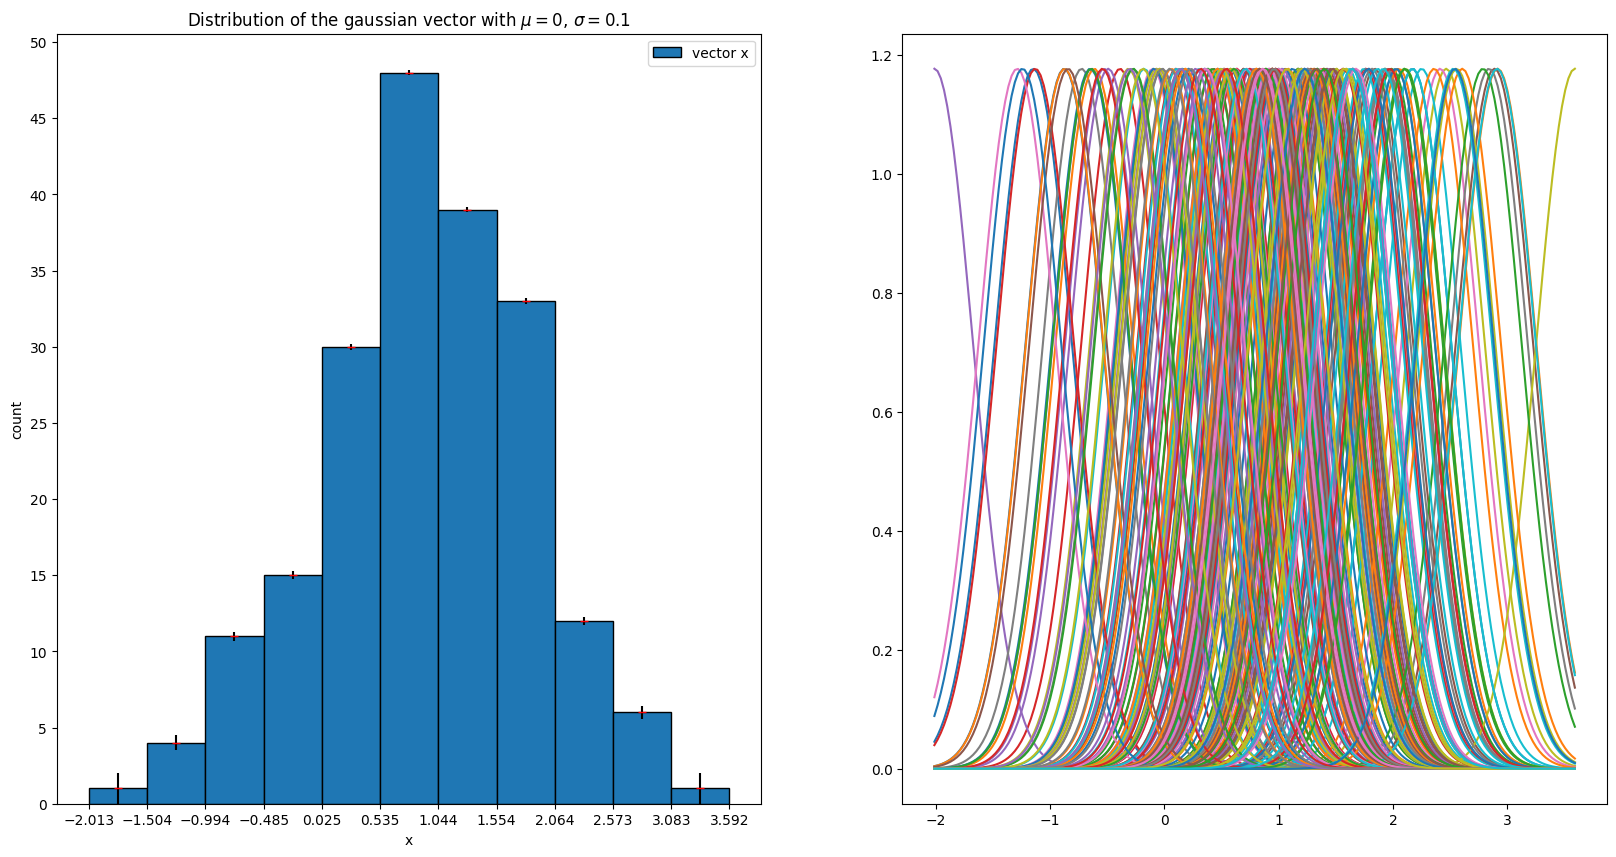

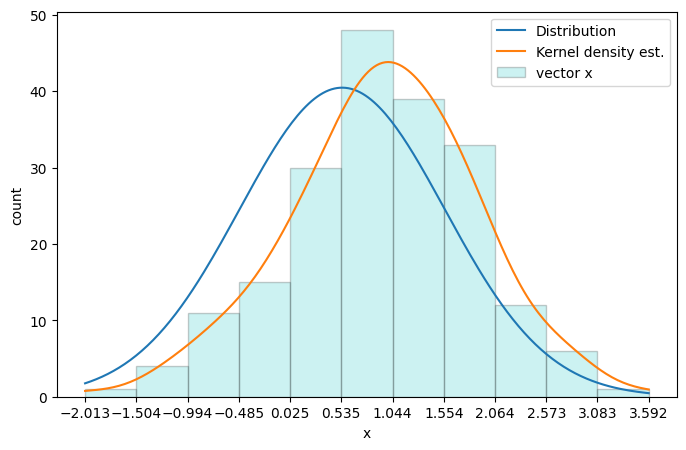

In [77]:
mu, sigma = 1, 1 # mean and standard deviation
N = 200
x = np.random.normal(mu, sigma, N)

# computing the number of bins with the same rule as before
binNumber = int(2*(len(x)**(1/3)))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

# plotting the first histogram containing the distribution of the gaussian vector
n, edges, _= ax1.hist(x, bins=binNumber, label="vector x", edgecolor='k')
ax1.set_xlabel("x")
ax1.set_ylabel("count")
ax1.set_yticks(range(0,59,5))
ax1.set_title("Distribution of the gaussian vector with $\mu=0$, $\sigma=0.1$")
ax1.legend()
ax1.set_xticks(edges)

# calculating the centre of each bin and the errors as Poisson uncertainty
centers = [(edges[i]+edges[i+1])*0.5 for i in range(0, len(edges)-1)]
errors = [1/(np.sqrt(i)) if i>0 else 0 for i in n]
# plotting the error bars
ax1.errorbar(centers, n, errors, fmt="_", ecolor="k",color="r")

# setting the default value for the standard deviation as specified
defaultStd = 1.06*x.std()*(len(x))**(-1/5)
# defining the data space
dataSpace = np.linspace(x.min(),x.max(),len(x))

# creating the gaussian distribution of each x
distributions = [scipy.stats.norm.pdf(dataSpace, loc=m, scale=defaultStd) for m in x]

# plot the resulting vector of distributions
for d in distributions: ax2.plot(dataSpace, d)
fig.show()

# summing the distributions just calculated
sumDistributions = np.array(distributions).sum(axis=0)
# calculate the distance between subsequent bins edges and integrate on our data space
dx = np.array([(edges[i]-edges[i-1]) for i in range(1,len(edges))])
area = scipy.integrate.trapezoid(sumDistributions, x=dataSpace)

# calculate the area of the histogram and normalize the sum of distributions
histogramArea = scipy.integrate.trapezoid(n, x=edges[0:-1])
normalized = (sumDistributions/area)*histogramArea

# instructions to have a pretty plot of the result 
fig, ax = plt.subplots(1,figsize=(8,5))
ax.plot(dataSpace, scipy.stats.norm.pdf(data,mu,sigma)*histogramArea, label = "Distribution")
ax.plot(dataSpace, normalized, label="Kernel density est.")
ax.hist(x, bins=binNumber, label="vector x", edgecolor = "black", color='c', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("count")
ax.set_xticks(edges)
ax.legend()
fig.show()